This is a demo of opticiq for the purpose of slant edge measurement.

Notes
- Everything is working.
- But cleanup, including some tweaks to naming conventions, would probably be worthwhile
- Improve documentation and examples, too

I0 shape (500, 600), type int64, max 331


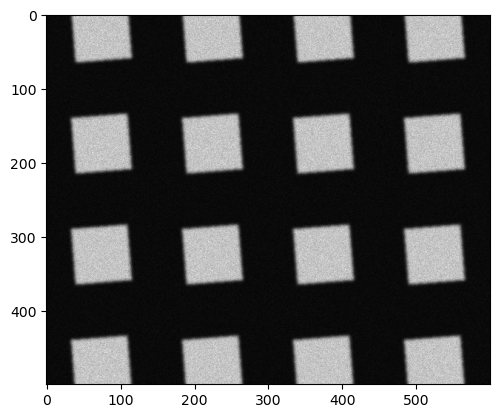

In [1]:
import numpy as np
import opticiq as iq
from opticiq import data
from matplotlib import pyplot as plt

I0 = data.demoS.slant
print('I0 shape %s, type %s, max %d' % (I0.shape, I0.dtype, I0.max()))
plt.imshow(I0, cmap='gray')

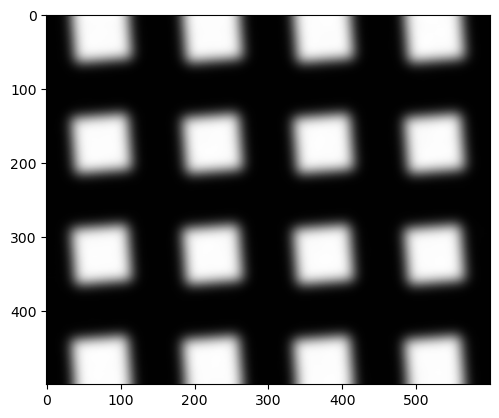

In [2]:
# run analysis recipe
data = iq.recipe_slantedge(I0, 8)
imG = data['imG']
# the analysis is done, but now make plots to illustrate
# show the blurred version, note that noise is reduced and gradient zones increased
plt.imshow(imG['I1'], cmap='gray')

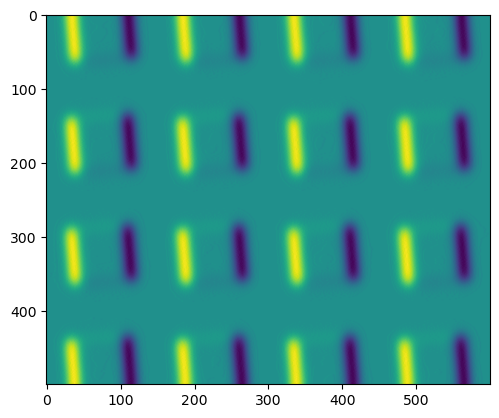

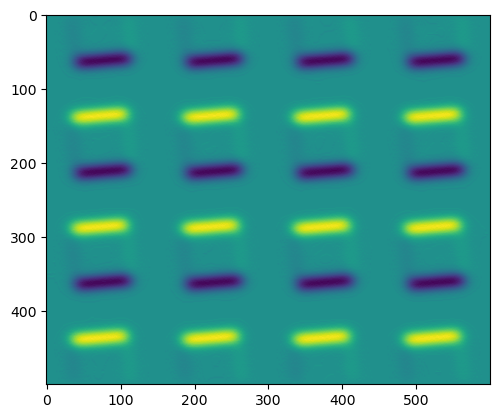

In [3]:
# show dI/dx of blurred
plt.figure()
plt.imshow(imG['I_x'])
# show dI/dy of blurred
plt.figure()
plt.imshow(imG['I_y'])

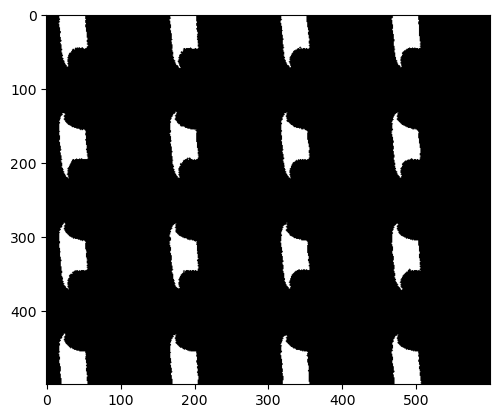

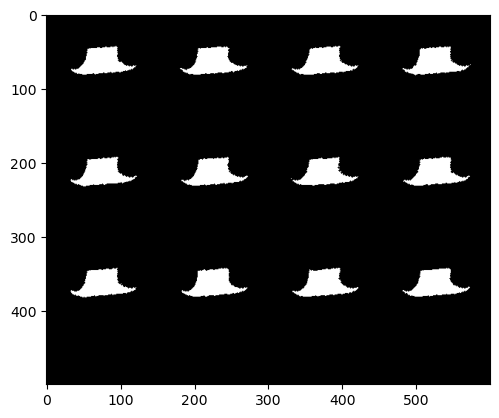

In [4]:
# show all masks for ver edges, positive going
plt.figure()
plt.imshow(imG['mask_v_pos'], cmap='gray')
# show all masks for hor edges, negative going
plt.figure()
plt.imshow(imG['mask_h_neg'], cmap='gray')

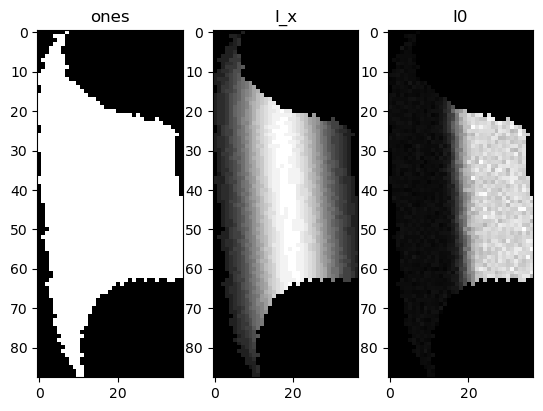

In [5]:
# show the mask, derivative, and original image for one of the vertical line, positive going ROI
data['roi_vp'].plot_k(5, imG, keys=['ones', 'I_x', 'I0'])

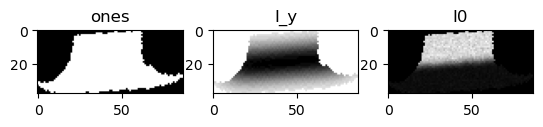

In [6]:
# show the mask, derivative, and original image for one of the horizontal line, negative going ROI
data['roi_hn'].plot_k(0, imG, keys=['ones', 'I_y', 'I0'])

Text(0.5, 1.0, 'MTF Modulation-Transfer-Function')

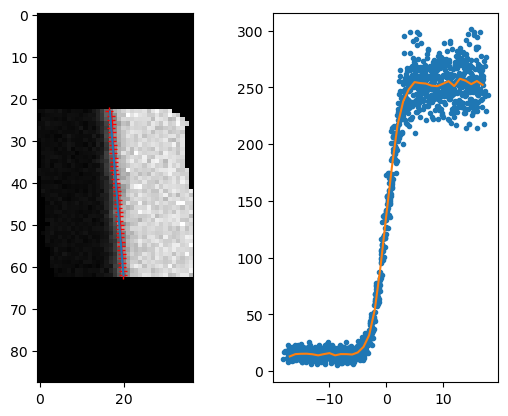

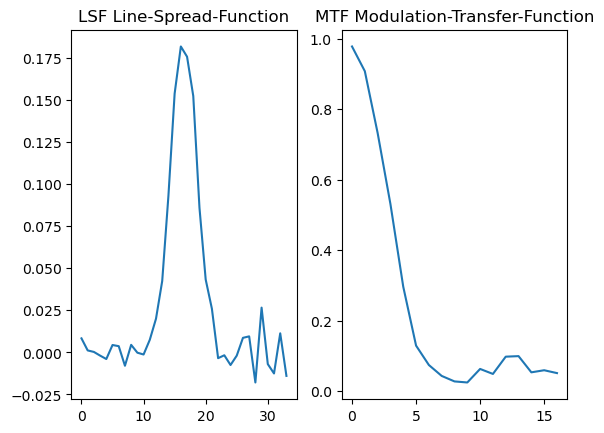

In [7]:
# Plot results from a vertical edge, positive-going I_x
k, ESF, x, LSF, MTF, details = data['esf_vp'][5]
iq.plot_edgeV_data(ESF, x, details)
plt.figure()
plt.subplot(1, 2, 1)
plt.plot(LSF)
plt.title('LSF Line-Spread-Function')
plt.subplot(1, 2, 2)
plt.plot(MTF)
plt.title('MTF Modulation-Transfer-Function')

Text(0.5, 1.0, 'MTF Modulation-Transfer-Function')

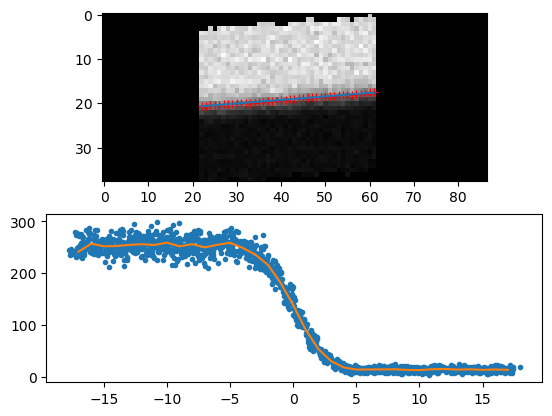

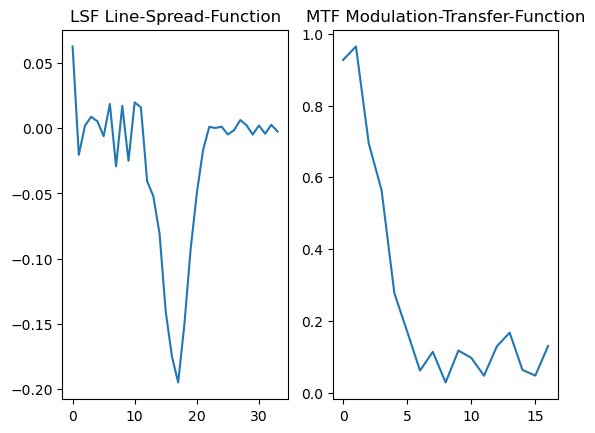

In [8]:
# Plot results from a horizontal edge, negative-going I_y
k, ESF, y, LSF, MTF, details = data['esf_hn'][0]
iq.plot_edgeH_data(ESF, y, details)
plt.figure()
plt.subplot(1, 2, 1)
plt.plot(LSF)
plt.title('LSF Line-Spread-Function')
plt.subplot(1, 2, 2)
plt.plot(MTF)
plt.title('MTF Modulation-Transfer-Function')